In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, LogisticRegression
from scipy import stats

In [26]:
# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Display missing values summary
print("Missing Values Summary:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Dataset shape: {df.shape}")

Missing Values Summary:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total missing values: 866
Dataset shape: (891, 12)


In [5]:
# Create visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 0, 'Percentage Missing')

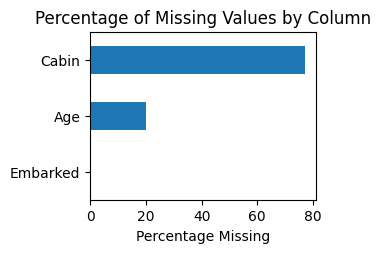

In [6]:
# Bar chart of missing percentages
plt.subplot(2, 2, 1)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0]
missing_percent.sort_values().plot(kind='barh')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage Missing')

Text(344.98989898989896, 0.5, 'Passengers')

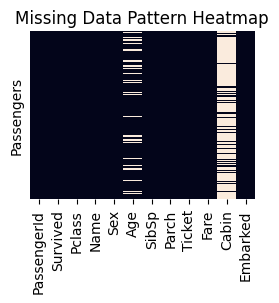

In [7]:
# Create a missingness matrix manually
plt.subplot(2, 2, 2)
missing_matrix = df.isnull().astype(int)
sns.heatmap(missing_matrix, cbar=False, yticklabels=False)
plt.title('Missing Data Pattern Heatmap')
plt.ylabel('Passengers')

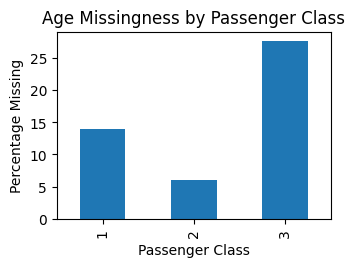

In [8]:
# Distribution of missing values by passenger class
plt.subplot(2, 2, 3)
df['age_missing'] = df['Age'].isnull()
class_missing = df.groupby('Pclass')['age_missing'].mean() * 100
class_missing.plot(kind='bar')
plt.title('Age Missingness by Passenger Class')
plt.ylabel('Percentage Missing')
plt.xlabel('Passenger Class')

plt.tight_layout()
plt.show()


In [9]:
# Test relationship between Age missingness and other variables
df['age_missing'] = df['Age'].isnull().astype(int)


In [10]:
# Check missingness by Pclass
print("Age Missingness by Passenger Class:")
print(df.groupby('Pclass')['age_missing'].mean())


Age Missingness by Passenger Class:
Pclass
1    0.138889
2    0.059783
3    0.276986
Name: age_missing, dtype: float64


In [11]:
# Statistical test for difference in means
class1 = df[df['Pclass'] == 1]['age_missing']
class2 = df[df['Pclass'] == 2]['age_missing']
class3 = df[df['Pclass'] == 3]['age_missing']


In [12]:
# Chi-square test for independence
contingency_table = pd.crosstab(df['Pclass'], df['age_missing'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square test for Age missingness by Pclass: p-value = {p_value:.4f}")



Chi-square test for Age missingness by Pclass: p-value = 0.0000


In [13]:
# Check if fare differs between those with and without age
has_age = df[df['Age'].notnull()]['Fare']
no_age = df[df['Age'].isnull()]['Fare']
t_stat, p_value_fare = stats.ttest_ind(has_age, no_age, equal_var=False, nan_policy='omit')
print(f"T-test for fare difference: p-value = {p_value_fare:.4f}")


T-test for fare difference: p-value = 0.0001


In [15]:
# Compare fare distribution for passengers with/without cabin info
has_cabin = df[df['Cabin'].notnull()]
no_cabin = df[df['Cabin'].isnull()]

print("Fare comparison:")
print(f"With cabin info: Mean fare = ${has_cabin['Fare'].mean():.2f}")
print(f"Without cabin info: Mean fare = ${no_cabin['Fare'].mean():.2f}")



Fare comparison:
With cabin info: Mean fare = $76.14
Without cabin info: Mean fare = $19.16


In [17]:
# T-test for fare difference
t_stat, p_value = stats.ttest_ind(has_cabin['Fare'].dropna(), no_cabin['Fare'].dropna(), equal_var=False)
print(f"T-test p-value: {p_value:.4f}")

T-test p-value: 0.0000


In [18]:
# Check relationship with passenger class
print("\nCabin missingness by passenger class:")
cabin_by_class = df.groupby('Pclass')['Cabin'].apply(lambda x: x.notnull().mean())
print(cabin_by_class)


Cabin missingness by passenger class:
Pclass
1    0.814815
2    0.086957
3    0.024440
Name: Cabin, dtype: float64


In [19]:
# Prepare data for imputation
df_impute = df.copy()


In [20]:
# Convert categorical variables to numeric
df_impute['Sex'] = df_impute['Sex'].map({'male': 0, 'female': 1})
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
df_impute['Embarked'] = df_impute['Embarked'].map(embarked_mapping)


In [21]:
# Select variables for imputation (focusing on Age)
impute_vars = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [22]:
# Use Iterative Imputer (MLE-based)
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)

In [23]:
# Impute missing values for Age
df_impute[impute_vars] = imputer.fit_transform(df_impute[impute_vars])


In [24]:
# For comparison, let's also use simple mean imputation
df_mean_impute = df.copy()
df_mean_impute['Age'].fillna(df_mean_impute['Age'].mean(), inplace=True)

print("Original Age statistics:")
print(f"Mean: {df['Age'].mean():.2f}, Std: {df['Age'].std():.2f}")

print("\nMLE-imputed Age statistics:")
print(f"Mean: {df_impute['Age'].mean():.2f}, Std: {df_impute['Age'].std():.2f}")

print("\nMean-imputed Age statistics:")
print(f"Mean: {df_mean_impute['Age'].mean():.2f}, Std: {df_mean_impute['Age'].std():.2f}")


Original Age statistics:
Mean: 29.70, Std: 14.53

MLE-imputed Age statistics:
Mean: 29.23, Std: 13.65

Mean-imputed Age statistics:
Mean: 29.70, Std: 13.00


/var/folders/07/bwb0cbq14pj8hwk6lp4grzz80000gn/T/ipykernel_16015/955272978.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean_impute['Age'].fillna(df_mean_impute['Age'].mean(), inplace=True)


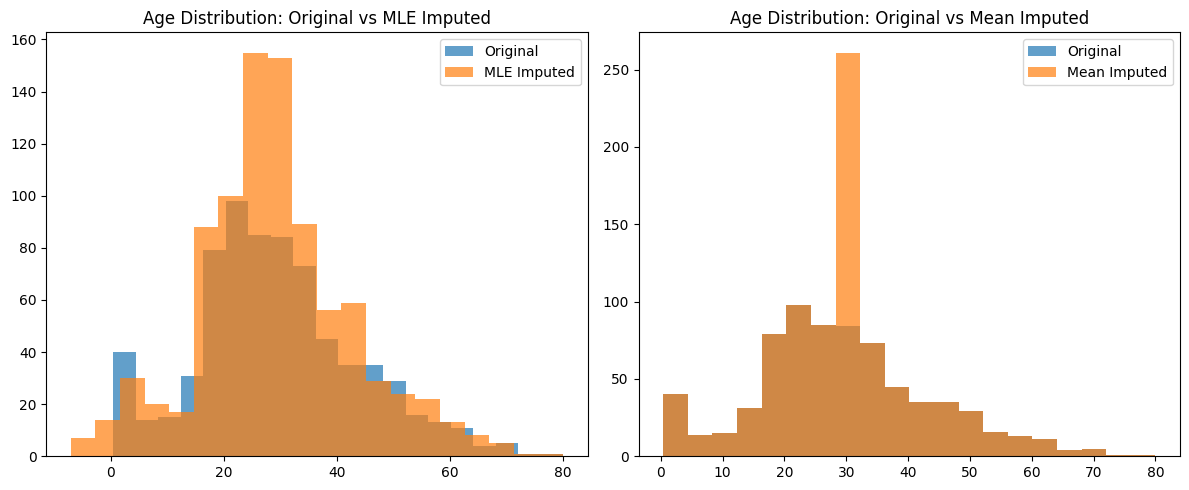

In [25]:
# Compare distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Age'].dropna(), alpha=0.7, label='Original', bins=20)
plt.hist(df_impute['Age'], alpha=0.7, label='MLE Imputed', bins=20)
plt.legend()
plt.title('Age Distribution: Original vs MLE Imputed')

plt.subplot(1, 2, 2)
plt.hist(df['Age'].dropna(), alpha=0.7, label='Original', bins=20)
plt.hist(df_mean_impute['Age'], alpha=0.7, label='Mean Imputed', bins=20)
plt.legend()
plt.title('Age Distribution: Original vs Mean Imputed')

plt.tight_layout()
plt.show()